In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('..')

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.MultiViewCTR import MultiViewCTR

In [4]:
data = pd.read_csv('../data/clean/move-lens-100k-all.csv').set_index(['user_id', 'item_id', 'timestamp'])

# assert not datapoint duplications
assert not data.reset_index()[['user_id', 'item_id']].duplicated().any()

data['rating'] = (data.rating >= 4).astype(int)
data.head()

rating  gender_F  gender_M  \
user_id item_id timestamp                               
259     286     874724727       1         0         1   
        185     874724781       1         0         1   
        173     874724843       1         0         1   
        288     874724905       0         0         1   
        117     874724988       1         0         1   

                           occupation_administrator  occupation_artist  \
user_id item_id timestamp                                                
259     286     874724727                         0                  0   
        185     874724781                         0                  0   
        173     874724843                         0                  0   
        288     874724905                         0                  0   
        117     874724988                         0                  0   

                           occupation_doctor  occupation_educator  \
user_id item_id timestamp                                           
259     286     874724727                  0                    0   
        185     874724781                  0                    0   
        173     874724843                  0                    0   
        288     874724905                  0                    0   
        117     874724988                  0                    0   

                           occupation_engineer  occupation_entertainment  \
user_id item_id timestamp                                                  
259     286     874724727                    0                         0   
        185     874724781                    0                         0   
        173     874724843                    0                         0   
        288     874724905                    0                         0   
        117     874724988                    0                         0   

                           occupation_executive  ...  genre_Western  \
user_id item_id timestamp                        ...                  
259     286     874724727                     0  ...              0   
        185     874724781                     0  ...              0   
        173     874724843                     0  ...              0   
        288     874724905                     0  ...              0   
        117     874724988                     0  ...              0   

                           genre_unknown  release_decade_1920.0  \
user_id item_id timestamp                                         
259     286     874724727              0                      0   
        185     874724781              0                      0   
        173     874724843              0                      0   
        288     874724905              0                      0   
        117     874724988              0                      0   

                           release_decade_1930.0  release_decade_1940.0  \
user_id item_id timestamp                                                 
259     286     874724727                      0                      0   
        185     874724781                      0                      0   
        173     874724843                      0                      0   
        288     874724905                      0                      0   
        117     874724988                      0                      0   

                           release_decade_1950.0  release_decade_1960.0  \
user_id item_id timestamp                                                 
259     286     874724727                      0                      0   
        185     874724781                      0                      1   
        173     874724843                      0                      0   
        288     874724905                      0                      0   
        117     874724988                      0                      0   

                           release_decade_1970.0  release_decade_1980.0

In [5]:
# init topic regressor
reg = MultiViewCTR(n_latent=2)

X = data.to_numpy()
reg.fit(X, n_iter=2)

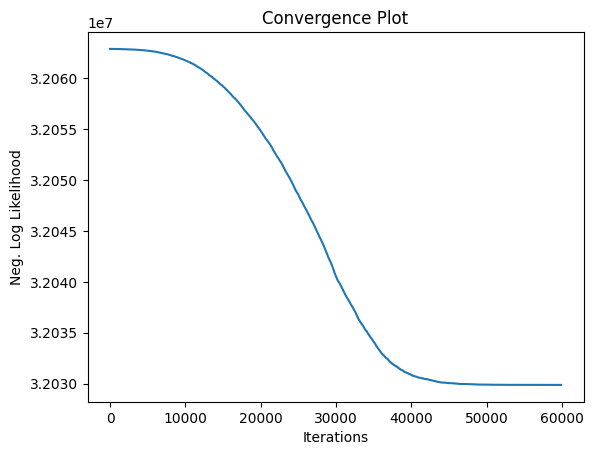

In [6]:
import matplotlib.pyplot as plt

plt.plot(reg.neg_log_likelihood)

plt.title('Convergence Plot')
plt.ylabel('Neg. Log Likelihood')
plt.xlabel('Iterations')

plt.show()

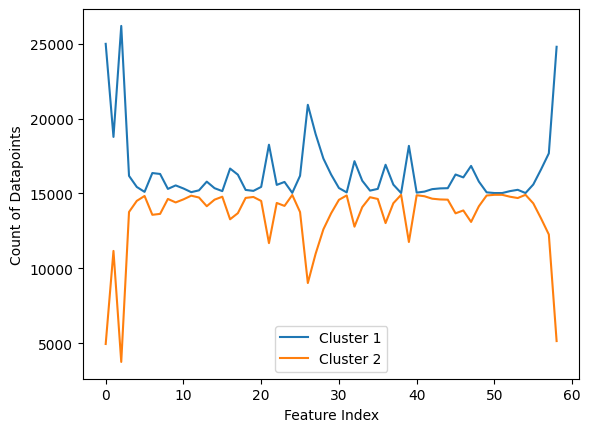

In [7]:
plt.plot(reg.cluster_feature_count.T)

plt.ylabel('Count of Datapoints')
plt.xlabel('Feature Index')

plt.legend(['Cluster 1', 'Cluster 2'])
plt.show()

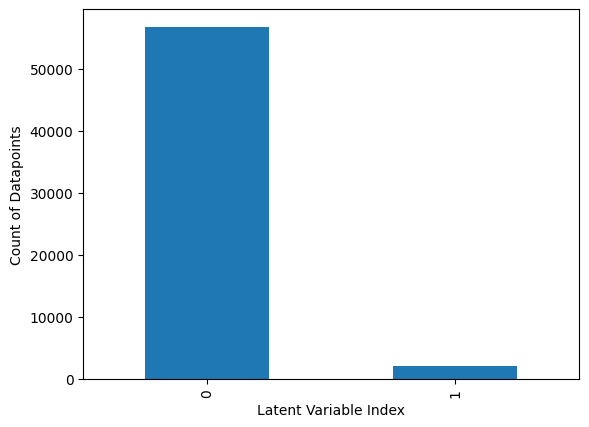

In [8]:
pd.Series(reg.trace[1000:]).value_counts().plot(kind='bar')

plt.ylabel('Count of Datapoints')
plt.xlabel('Latent Variable Index')

plt.show()

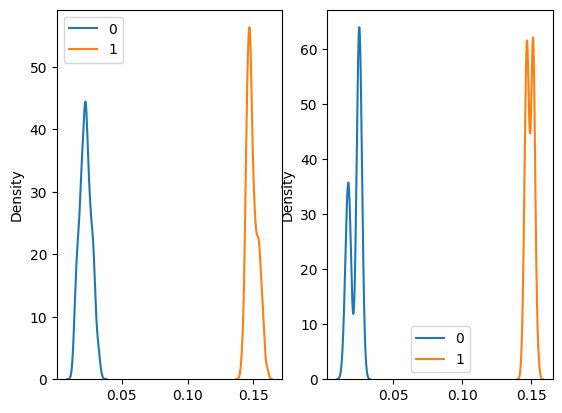

In [27]:
user_embs = reg.predict(X, idx=data.index.get_level_values('user_id'))
item_embs = reg.predict(X, idx=data.index.get_level_values('item_id'))

import seaborn as sns
fig, ax = plt.subplots(1, 2)
sns.kdeplot(user_embs, ax=ax[0])
sns.kdeplot(item_embs, ax=ax[1])
plt.show()

In [24]:
user_embs

array([[-3.74919662, -1.92626185],
       [-4.12046779, -1.88314978],
       [-3.47014841, -1.90314259],
       ...,
       [-3.42706987, -1.95682867],
       [-4.21994295, -1.86341291],
       [-3.58702094, -1.9314164 ]])